In [214]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [215]:
diabetes_df = pd.read_csv('diabetes.csv')

In [216]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [217]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [218]:
#Checking for zero values
Glucose_zero_count=(diabetes_df['Glucose'] == 0).sum()
print (Glucose_zero_count)
BloodPressure_zero_count=(diabetes_df['BloodPressure'] == 0).sum()
print(BloodPressure_zero_count)
SkinThickness_zero_count=(diabetes_df['SkinThickness'] == 0).sum()
print (SkinThickness_zero_count)
#REPLACING ZERO VALUES 
diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, diabetes_df.mean())

5
35
227


In [219]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


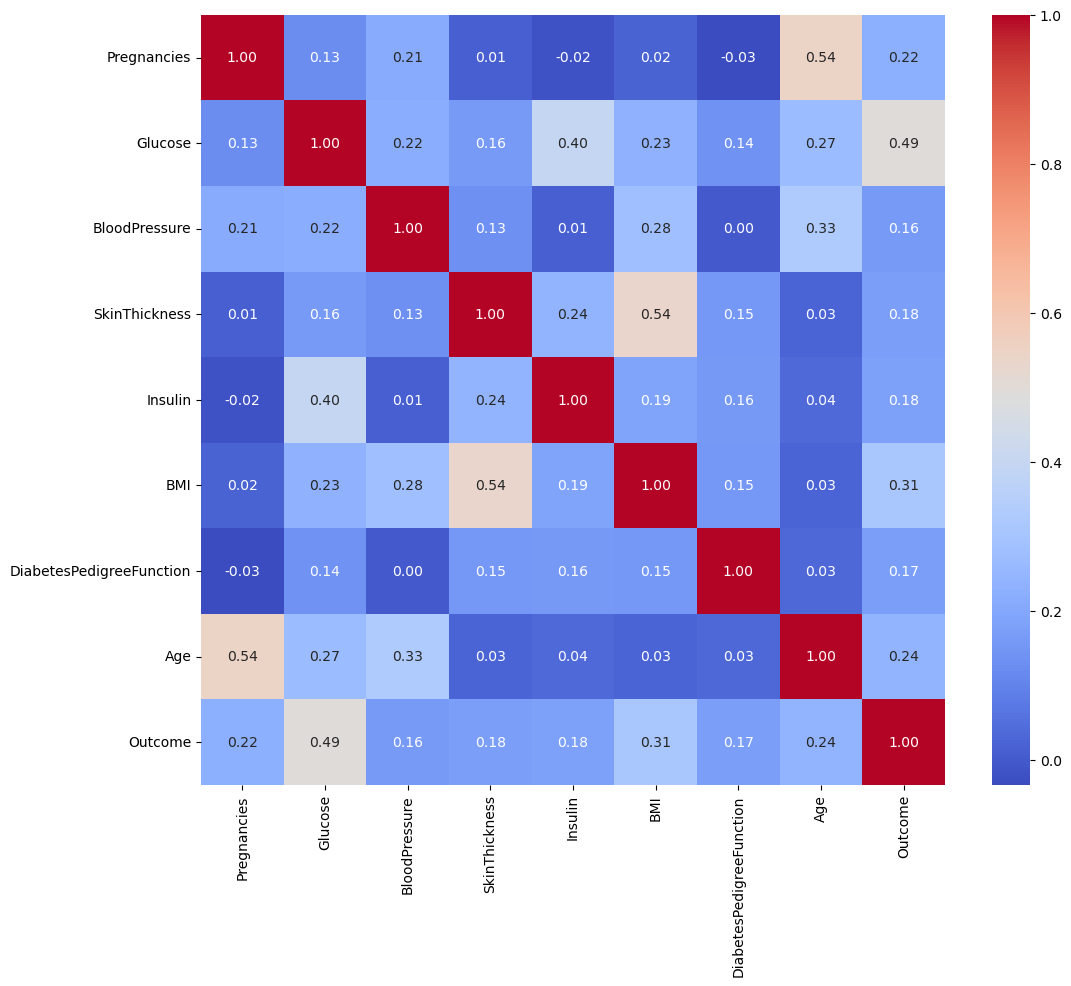

In [220]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [221]:
VARIANCE = diabetes_df.var()
print(VARIANCE)

Pregnancies                   11.354056
Glucose                      926.351048
BloodPressure                146.795798
SkinThickness                 92.760798
Insulin                     8663.952981
BMI                           47.270761
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64


In [222]:
diabetes_df.drop(columns=["Insulin","BloodPressure","DiabetesPedigreeFunction"], axis =1 , inplace = True)

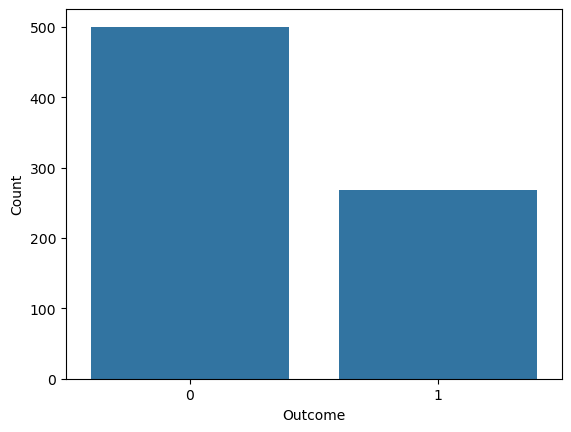

In [223]:
# Count plot for the target variable
sns.countplot(x='Outcome', data=diabetes_df)
plt.ylabel('Count')
plt.show()

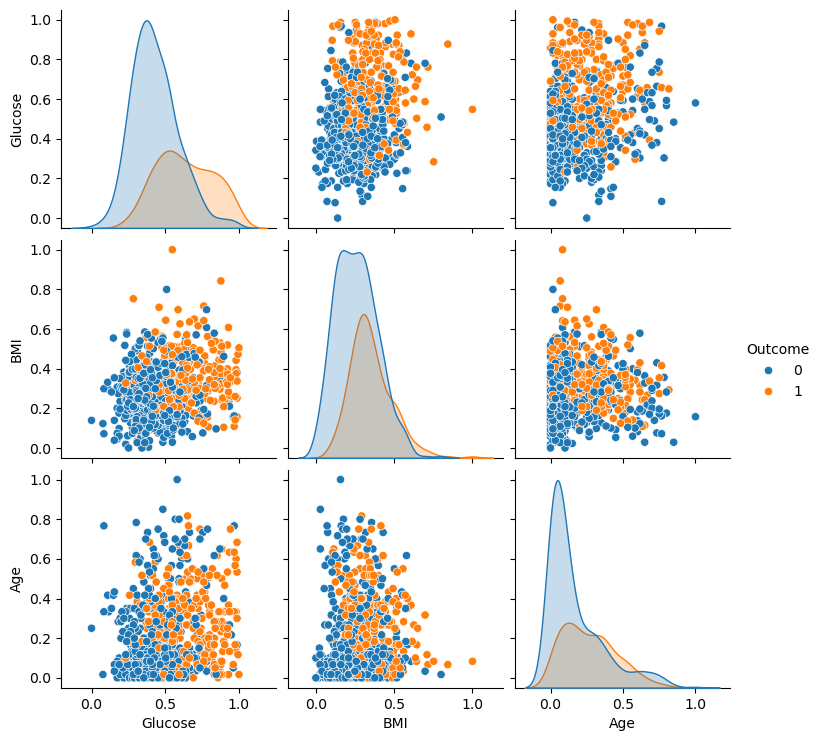

In [224]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
diabetes_scaled = diabetes_df.copy()
diabetes_scaled[['Glucose', 'BMI', 'Age']] = scaler.fit_transform(diabetes_scaled[['Glucose', 'BMI', 'Age']])

sns.pairplot(
    diabetes_scaled[['Glucose', 'BMI', 'Age', 'Outcome']], 
    hue='Outcome', 
    diag_kind='kde'
)

In [225]:
# Split data
X = diabetes_scaled.drop('Outcome', axis=1)
y = diabetes_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
Accuracies= {} # make dictionry to save all accuracies models

In [227]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
# Predict probabilities for the positive class
y_pred=lr.predict(X_test)
y_proba=lr.predict_proba(X_test)


In [228]:
from sklearn.metrics import roc_auc_score

In [229]:

# Calculate ROC curve .
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
# Calculate AUC
auc = roc_auc_score(y_test, y_proba[:, 1])


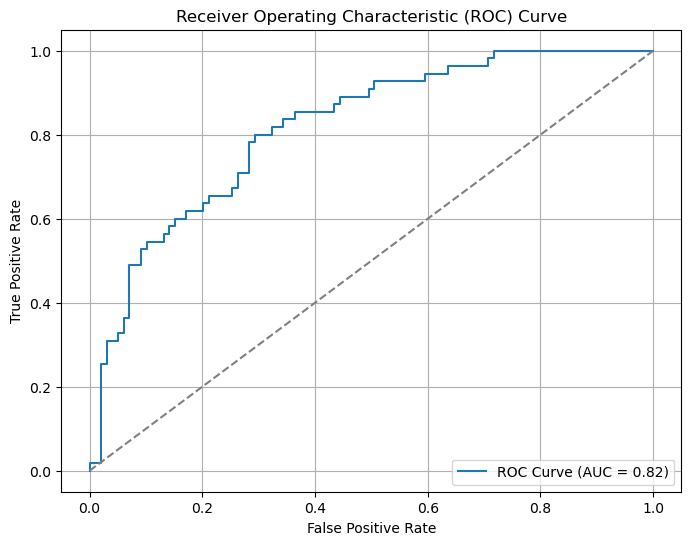

In [230]:
# Plot ROC curves
def plot_roc(fpr, tpr, auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.axis('tight')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc(fpr, tpr, auc)


Accuracy: 74.68%
Logistic TRAIN score with  0.762214983713355
Logistic TEST score with  0.7467532467532467

[[82 17]
 [22 33]]


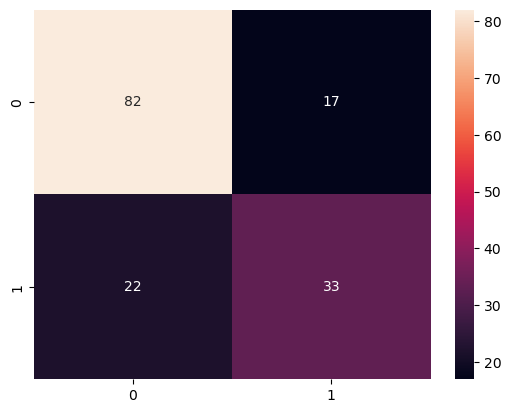

In [231]:
acc = accuracy_score(y_test, y_pred) * 100
Accuracies['diabities_Logistic Regression'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

In [300]:


# Train KNN model
knn = KNeighborsClassifier(n_neighbors=7)  # You can tune the number of neighbors
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

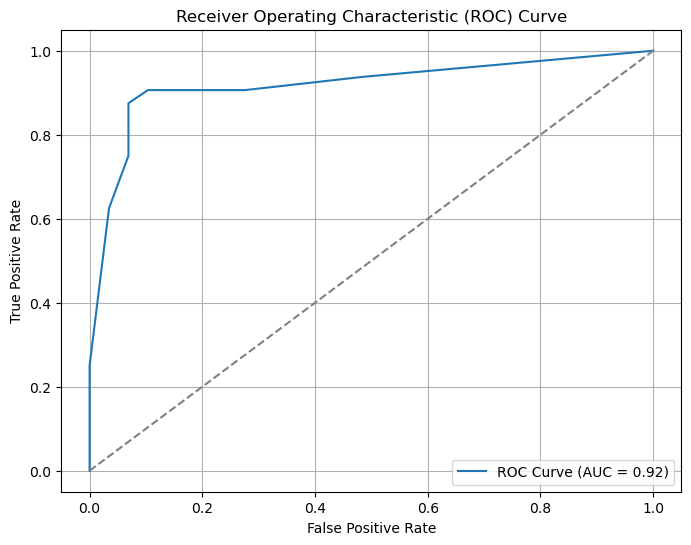

In [301]:
y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
auc = roc_auc_score(y_test, y_proba[:, 1])
plot_roc(fpr,tpr,auc)

Accuracy: 90.16%
KNN TRAIN score with  0.871900826446281
KNN TEST score with  0.9016393442622951

[[27  2]
 [ 4 28]]


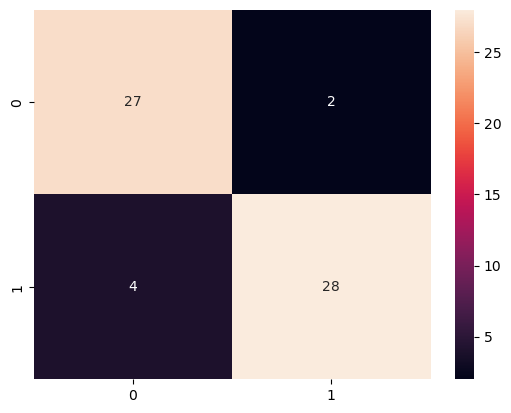

In [302]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['diabities_KNN'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

IS THE TEST AND TRAIN PRECENTAGE NORMAL?

In [305]:
heart_df = pd.read_csv('heart.csv')

In [306]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [307]:
heart_df.info()
heart_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [308]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

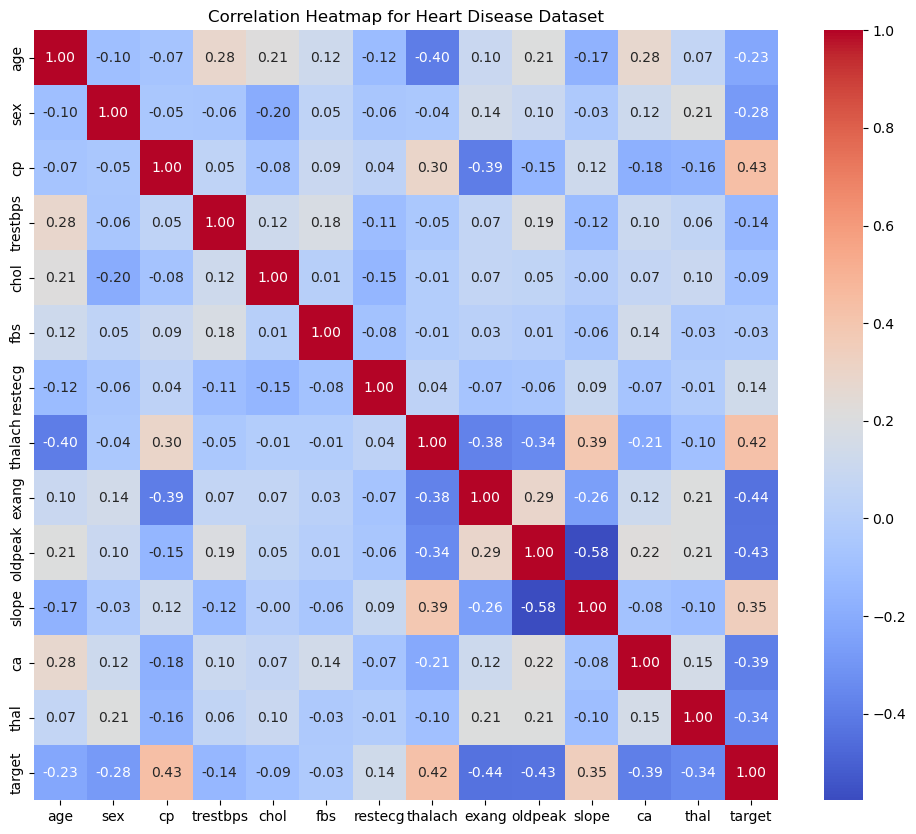

In [309]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Heart Disease Dataset')
plt.show()

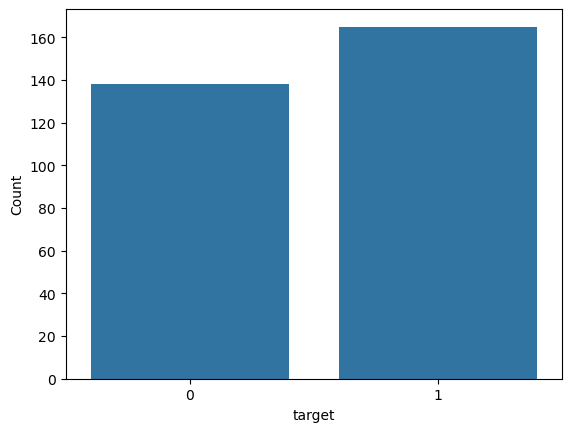

In [310]:
# Count plot for the target variable
sns.countplot(x='target', data=heart_df)
plt.ylabel('Count')
plt.show()

In [311]:
VARIANCE2 = diabetes_df.var()
print(VARIANCE2)

Pregnancies       11.354056
Glucose          926.351048
SkinThickness     92.760798
BMI               47.270761
Age              138.303046
Outcome            0.227483
dtype: float64


In [312]:
heart_df.drop(columns=["fbs"], axis =1 , inplace = True)

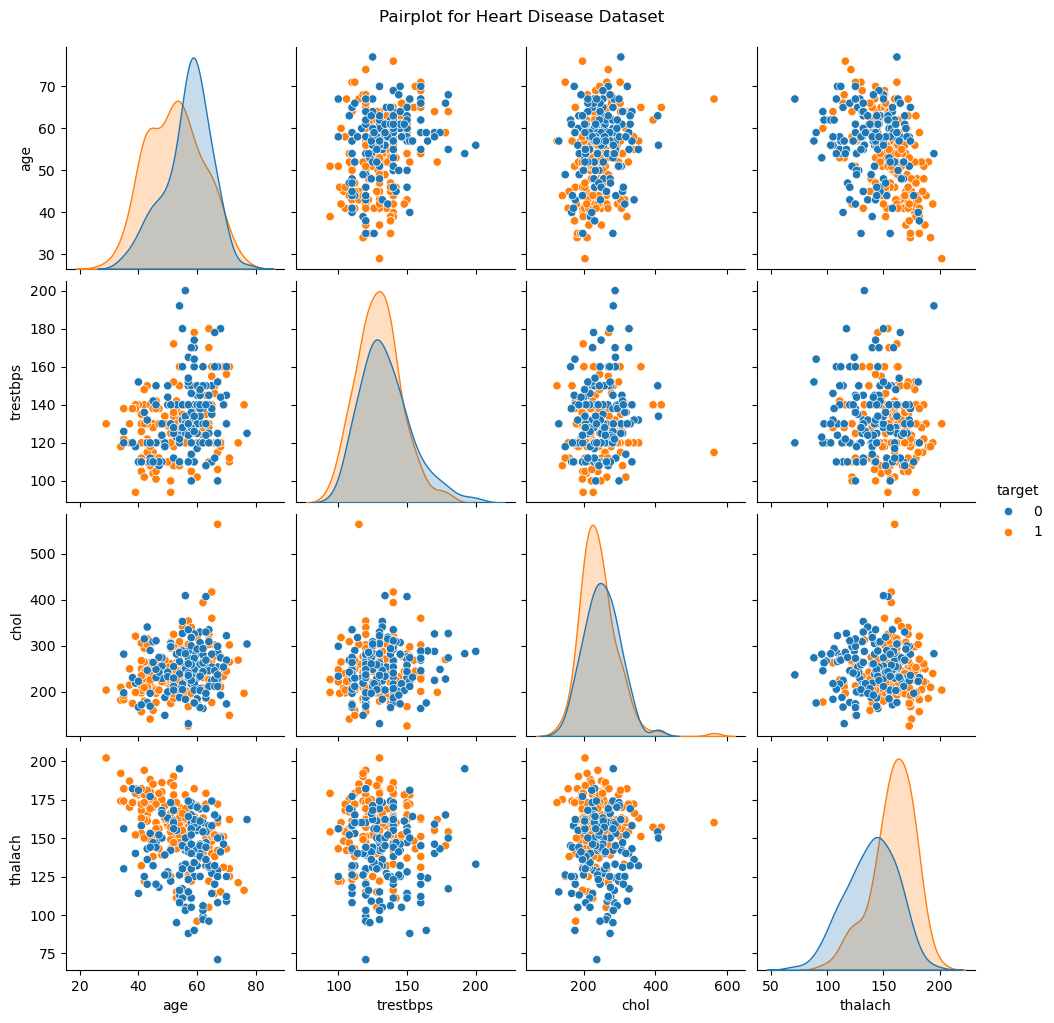

In [313]:
# Pairplot (use a subset of data for faster plotting)
sns.pairplot(heart_df[['age', 'trestbps','chol', 'thalach', 'target']], hue='target', diag_kind='kde')
plt.suptitle('Pairplot for Heart Disease Dataset', y=1.02)
plt.show()

In [314]:
from sklearn.preprocessing import StandardScaler

In [315]:
# Split data into features (X) and target (y)
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


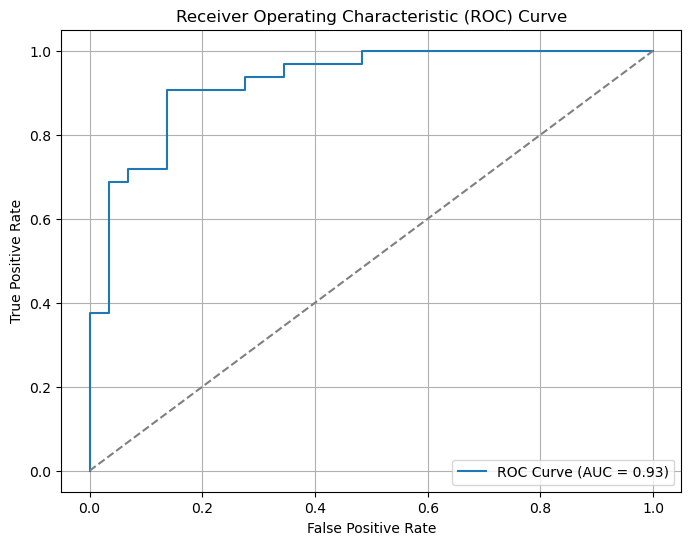

In [316]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
# Predict probabilities for the positive class
y_pred=lr.predict(X_test)
y_proba=lr.predict_proba(X_test)


# Calculate ROC curve .
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
# Calculate AUC
auc = roc_auc_score(y_test, y_proba[:, 1])


plot_roc(fpr, tpr, auc)



Accuracy: 86.89%
Logistic TRAIN score with  0.859504132231405
Logistic TEST score with  0.8688524590163934

[[25  4]
 [ 4 28]]


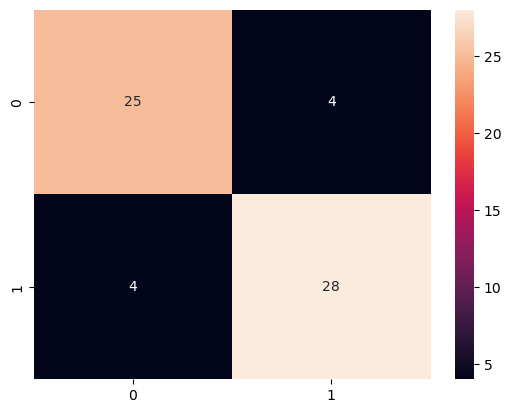

In [317]:
acc = accuracy_score(y_test, y_pred) * 100
Accuracies['heart_Logistic Regression'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

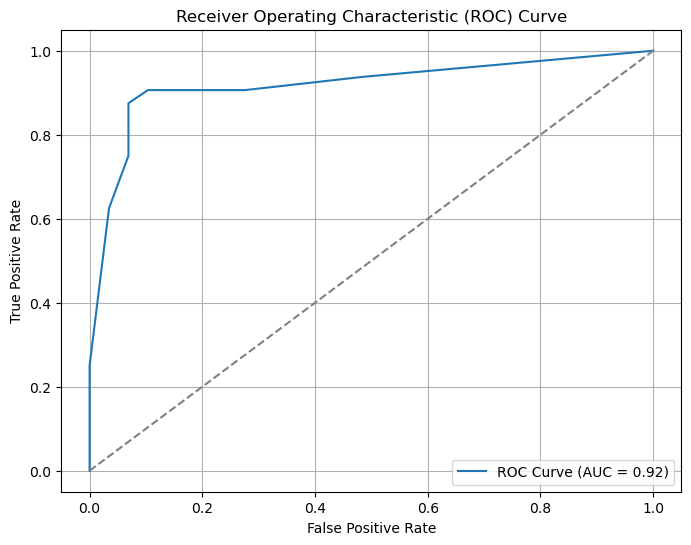

In [318]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=7)  # You can tune the number of neighbors
knn.fit(X_train, y_train)


y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
auc = roc_auc_score(y_test, y_proba[:, 1])
plot_roc(fpr,tpr,auc)

Accuracy: 90.16%
KNN TRAIN score with  0.871900826446281
KNN TEST score with  0.9016393442622951

[[27  2]
 [ 4 28]]


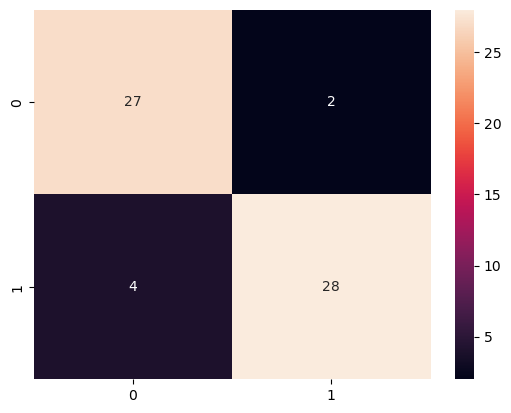

In [346]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['heart_KNN'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

In [348]:
Accuracies

{'diabities_Logistic Regression': 74.67532467532467,
 'diabities_KNN': 90.1639344262295,
 'heart_Logistic Regression': 86.88524590163934,
 'heart_KNN': 90.1639344262295}

C:\Users\Edge\AppData\Local\Temp\ipykernel_12448\3063608406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Accuracies.keys()), y=list(Accuracies.values()), palette='coolwarm')


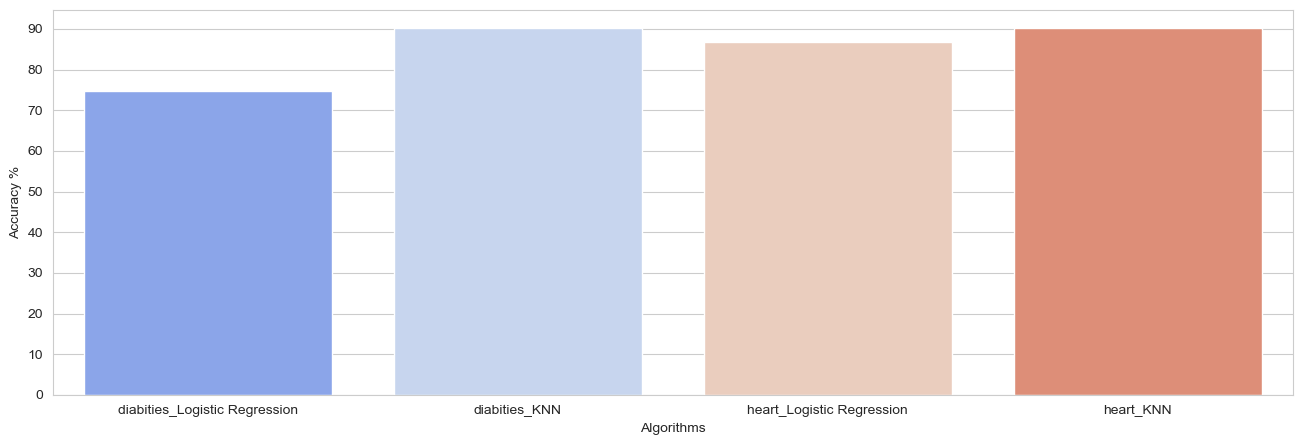

In [350]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(Accuracies.keys()), y=list(Accuracies.values()), palette='coolwarm')
plt.show()